In [1]:
# AUTHOR: Mihir Chakradeo (mchakradeo@cs.stonybrook.edu)
# Task: Google Search impact on Crypto-Currency

# Google Search Impact on Cryptocurrencies
### Hypothesis:
1. Bitcoin price and Frequency of Google Searches follow the same distribution
2. Predicting Bitcoin price from Frequency of Google Searches using Simple Linear Regression
3. Multiple Linear Regression to find out which Bitcoin feature is influenced the most by Google Search Frequency  

### Data Preprocessing

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats
import scipy.stats as st
import utils
plt.style.use('fivethirtyeight')

In [9]:
btc_data = pd.read_csv('prices/bitcoin_dataset.csv')
btc_price = pd.read_csv('prices/bitcoin_price.csv')
trend_data = pd.read_csv('supporting datasets/googletrend.csv')

In [54]:
btc_data

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23,0.000000,2110700.0,0.000000e+00,0.000000e+00,0.000000,0.000216,0.0,1.000000,0.000000,...,25100.000000,0.000000,252.0,252.0,42613.0,252.0,252.0,1.260000e+04,50.000000,0.000000e+00
1,2010-02-24,0.000000,2120200.0,0.000000e+00,0.000000e+00,0.000000,0.000282,0.0,1.000000,0.000000,...,179.245283,0.000000,195.0,196.0,42809.0,196.0,196.0,1.480000e+04,5300.000000,0.000000e+00
2,2010-02-25,0.000000,2127600.0,0.000000e+00,0.000000e+00,0.000000,0.000227,0.0,1.000000,0.000000,...,1057.142857,0.000000,150.0,150.0,42959.0,150.0,150.0,8.100000e+03,700.000000,0.000000e+00
3,2010-02-26,0.000000,2136100.0,0.000000e+00,0.000000e+00,0.000000,0.000319,0.0,1.000000,0.000000,...,64.582059,0.000000,176.0,176.0,43135.0,176.0,176.0,2.934900e+04,13162.000000,0.000000e+00
4,2010-02-27,0.000000,2144750.0,0.000000e+00,0.000000e+00,0.000000,0.000223,0.0,1.000000,0.000000,...,1922.222222,0.000000,176.0,176.0,43311.0,176.0,176.0,9.101000e+03,450.000000,0.000000e+00
5,2010-02-28,0.000000,2152850.0,0.000000e+00,0.000000e+00,0.000000,0.000291,0.0,1.000000,0.000000,...,154.285714,0.000000,165.0,165.0,43476.0,165.0,165.0,1.339900e+04,5250.000000,0.000000e+00
6,2010-03-01,0.000000,2162150.0,0.000000e+00,0.000000e+00,0.000000,0.000228,0.0,1.000000,0.000000,...,930.000000,0.000000,187.0,187.0,43663.0,187.0,187.0,1.030000e+04,1000.000000,0.000000e+00
7,2010-03-02,0.000000,2171950.0,0.000000e+00,0.000000e+00,0.000000,0.000248,0.0,1.000000,0.000000,...,376.923077,0.000000,203.0,204.0,43867.0,204.0,204.0,1.240000e+04,2600.000000,0.000000e+00
8,2010-03-03,0.000000,2179350.0,0.000000e+00,0.000000e+00,0.000000,0.000220,0.0,1.000000,0.000000,...,2960.000000,0.000000,150.0,151.0,44018.0,151.0,151.0,7.650000e+03,250.000000,0.000000e+00
9,2010-03-04,0.000000,2188450.0,0.000000e+00,0.000000e+00,0.000000,0.000296,0.0,1.000000,0.000000,...,88.349515,0.000000,187.0,187.0,44205.0,187.0,187.0,1.940000e+04,10300.000000,0.000000e+00


In [10]:
b = pd.read_csv('prices/bitcoin_price.csv')
b = b.drop(columns=['Volume', 'Open', 'Low', 'High', 'Market Cap'])

In [11]:
b['Date'] = pd.to_datetime(b['Date'])
b.head()

,Date,Close
0,2018-02-20,11403.7
1,2018-02-19,11225.3
2,2018-02-18,10551.8
3,2018-02-17,11112.7
4,2018-02-16,10233.9


#### Convert date to datetime format

In [12]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_price['Date'] = pd.to_datetime(btc_price['Date'])
trend_data['Date'] = pd.to_datetime(trend_data['Date'])

In [13]:
# Remove later
btc_price.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1755,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1756,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1757,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1758,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1759,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


#### Merging over Date col

In [14]:
# btc_merged = btc_data.merge(trend_data)
btc_merged = b.merge(trend_data)

In [15]:
btc_merged['btc_market_price'] = btc_merged['Close']

In [16]:
btc_merged.tail()

,Date,Close,Searches,btc_market_price
247,2013-05-26,133.48,2,133.48
248,2013-05-19,121.99,2,121.99
249,2013-05-12,115.00,3,115.00
250,2013-05-05,115.91,3,115.91
251,2013-04-28,134.21,3,134.21


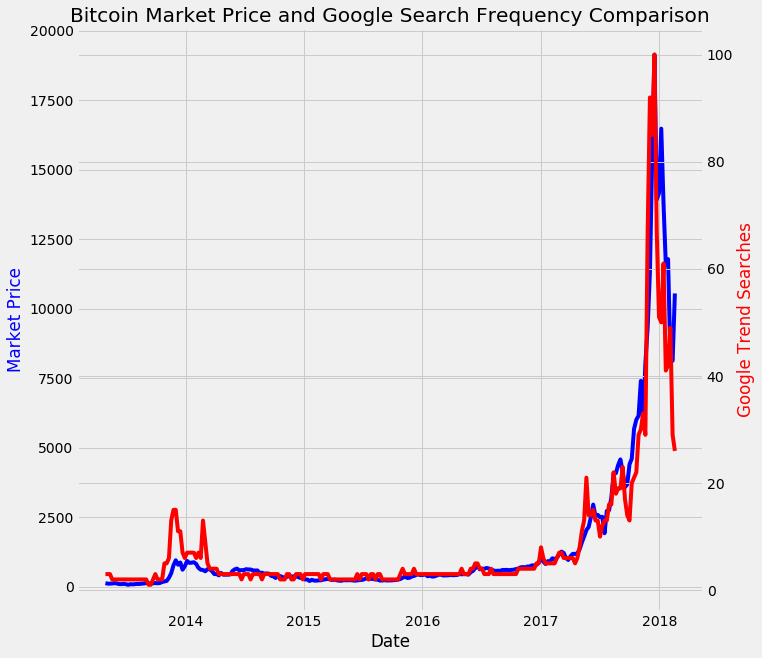

In [409]:
x = btc_merged['Date']
y1 = btc_merged['btc_market_price']
y2 = btc_merged['Searches']
fig, ax1 = plt.subplots(figsize=(10,10))
plt.title("Bitcoin Market Price and Google Search Frequency Comparison")
ax2 = ax1.twinx()
ax1.plot(x, y1, 'b-')
ax2.plot(x, y2, 'r-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Market Price', color='b')
ax2.set_ylabel('Google Trend Searches', color='r')
plt.savefig("TrendTopicComparison", bbox_inches="tight")
plt.show()

## [I] Predictions
### 1. Simple Linear Regression

In [19]:
model = LinearRegression()
searches = np.array(btc_merged['Searches']).reshape(-1,1)
btcmp = np.array(btc_merged['btc_market_price']).reshape(-1,1)
# Normalizing data
# searches = searches/max(searches)
btcmp = (1.0*btcmp/max(btcmp))*(100)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(searches, btcmp, test_size=0.33, random_state=42)

In [21]:
# model.fit(X_train, y_train)
# beta = model.coef_
beta = utils.MultipleLinearRegression(X_train, y_train)
print("beta:",beta)

('beta:', array([[0.98041022]]))


In [22]:
# model.score(X_test,y_test)
y_hat = X_test.dot(beta)

In [23]:
# y_hat = model.predict(X_test)

In [55]:
sse = utils.SSE(y_test, y_hat)
mape = utils.MAPE(y_test, y_hat)
rms = np.sqrt(mean_squared_error(y_test, y_hat))
print("sse:",sse)
print("mape:",mape)
print("rms:",rms)

('sse:', array([2051.36776954]))
('mape:', array([52.93530538]))
('rms:', 4.941765360226465)


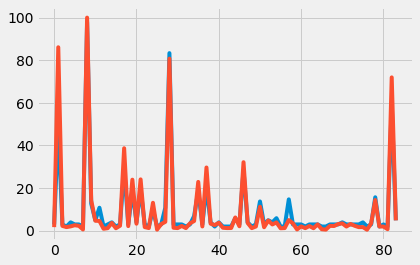

In [25]:
plt.plot(y_hat)
plt.plot(y_test)

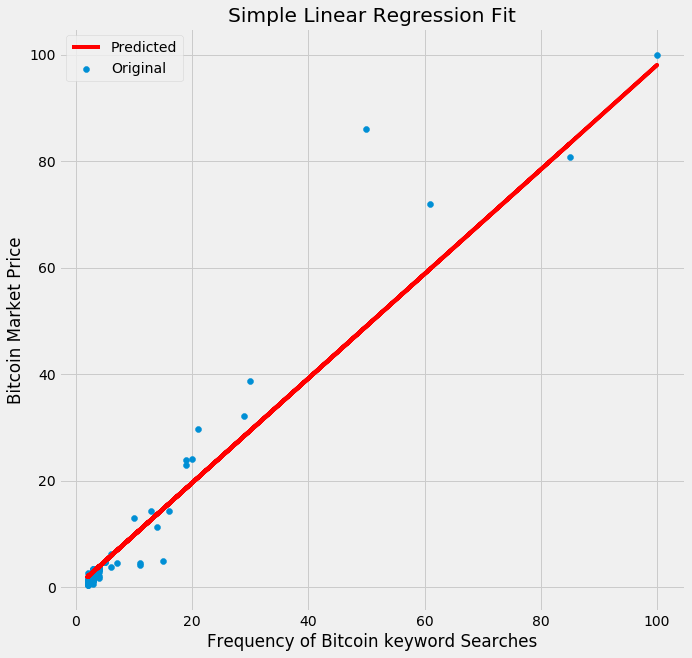

In [26]:
plt.figure(figsize=(10,10))
plt.title("Simple Linear Regression Fit")
plt.scatter(X_test, y_test, label="Original")
plt.plot(X_test, y_hat, 'r-', label="Predicted")
plt.xlabel("Frequency of Bitcoin keyword Searches")
plt.ylabel("Bitcoin Market Price")
plt.legend()
plt.savefig("Topic1LinearRegression",bbox_inches="tight")

## [II] Hypothesis Testing

### 1. KS Test

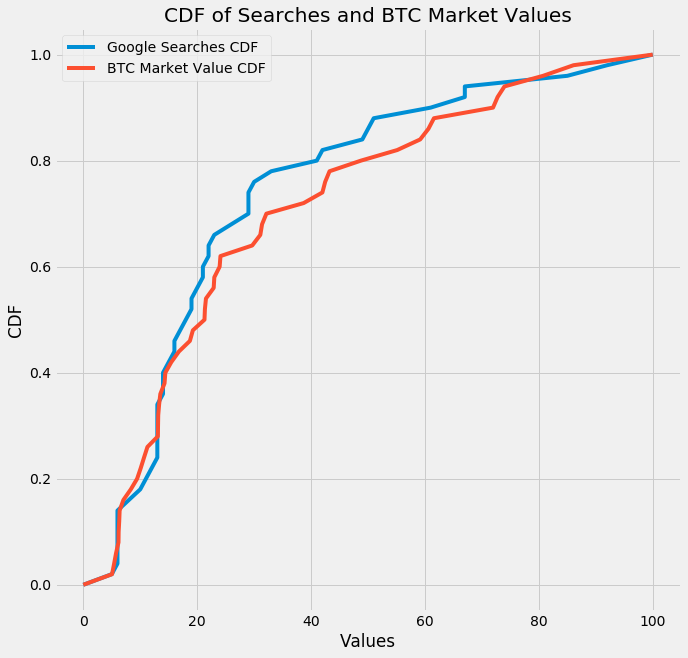

In [51]:
plt.figure(figsize=(10,10))

plt.title("CDF of Searches and BTC Market Values")
plt.xlabel("Values")
plt.ylabel("CDF")
tx, ty = utils.plot_a(searches[:50].astype(float))
tx = np.insert(tx, 0,0)
ty = np.insert(ty, 0,0)
cdf1 = plt.plot(tx,ty, label="Google Searches CDF")
plt.legend([cdf1])

tx1, ty1 = utils.plot_a(btcmp[:50].astype(float))
tx1 = np.insert(tx1, 0,0)
ty1 = np.insert(ty1, 0,0)
# print(tx1)
# tx = tx[:50]
# ty = ty[:50]
# tx1 = tx1[:50]
# ty1 = ty1[:50]
cdf2 = plt.plot(tx1,ty1, label="BTC Market Value CDF")
plt.legend()
plt.savefig("KS_test", bbox_inches="tight")

#### Calculating $D(F_X, F_Y)$

In [50]:
stats.ks_2samp(tx,tx1)

Ks_2sampResult(statistic=0.11764705882352944, pvalue=0.8497102634153845)

### Wald's Test

In [411]:
# Noramlizing
bt = btc_merged['Close']
close = (1.0*bt/max(bt))*(100)

In [412]:
btc_merged['Close'] = close

#### First proving asymptotically normal using monthly average

In [48]:
btc_merged.head()

,Date,Close,Searches,btc_market_price,Year,Month
0,2018-02-18,55.127267,26,10551.80,2018,2
1,2018-02-11,42.474557,29,8129.97,2018,2
2,2018-02-04,43.242759,49,8277.01,2018,2
3,2018-01-28,61.576841,42,11786.30,2018,1
4,2018-01-21,60.604050,41,11600.10,2018,1


In [49]:
btc_merged['Year'] = btc_merged['Date'].apply(lambda x: x.year)
btc_merged['Month'] = btc_merged['Date'].apply(lambda x: x.month)
btc_merged.head()

,Date,Close,Searches,btc_market_price,Year,Month
0,2018-02-18,55.127267,26,10551.80,2018,2
1,2018-02-11,42.474557,29,8129.97,2018,2
2,2018-02-04,43.242759,49,8277.01,2018,2
3,2018-01-28,61.576841,42,11786.30,2018,1
4,2018-01-21,60.604050,41,11600.10,2018,1


In [50]:
monthly_avg = btc_merged.groupby(['Year', 'Month']).mean()
(monthly_avg)
# mAvg_BTC = monthly_avg.reset_index()

Close   Searches  btc_market_price
Year Month                                        
2013 4       0.701172   3.000000          134.2100
     5       0.635266   2.500000          121.5950
     6       0.549622   2.000000          105.2020
     7       0.469899   2.000000           89.9425
     8       0.582199   2.000000          111.4375
     9       0.686314   1.800000          131.3660
     10      0.833534   2.750000          159.5450
     11      2.361487   9.750000          452.0075
     12      4.169178  10.000000          798.0140
2014 1       4.640598   7.000000          888.2475
     2       3.566622   8.000000          682.6800
     3       2.977305   5.200000          569.8800
     4       2.362911   3.250000          452.2800
     5       2.472650   3.000000          473.2850
     6       3.222749   2.800000          616.8600
     7       3.239232   2.750000          620.0150
     8       2.774785   2.800000          531.1160
     9       2.267630   3.000000          434.0425
     10      1.885122   2.500000          360.8275
     11      1.904466   2.400000          364.5300
     12      1.782593   2.750000          341.2025
2015 1       1.298156   3.000000          248.4775
     2       1.203163   2.750000          230.2950
     3       1.391384   2.600000          266.3220
     4       1.226150   2.000000          234.6950
     5       1.241954   2.000000          237.7200
     6       1.239982   2.500000          237.3425
     7       1.500825   2.750000          287.2700
     8       1.319830   2.600000          252.6260
     9       1.220325   2.000000          233.5800
     10      1.346117   2.250000          257.6575
     11      1.791775   3.200000          342.9600
     12      2.204767   3.250000          422.0100
2016 1       2.123255   3.000000          406.4080
     2       2.163115   3.000000          414.0375
     3       2.171121   3.000000          415.5700
     4       2.257508   3.000000          432.1050
     5       2.438299   3.400000          466.7100
     6       3.449320   4.500000          660.2275
     7       3.420380   3.400000          654.6880
     8       3.028060   3.000000          579.5950
     9       3.168689   3.000000          606.5125
     10      3.373109   3.400000          645.6400
     11      3.757171   4.000000          719.1525
     12      4.219142   4.500000          807.5775
2017 1       4.780887   5.800000          915.1000
     2       5.537373   5.750000         1059.8975
     3       5.867009   6.250000         1122.9925
     4       6.298671   6.200000         1205.6160
     5       9.929862  14.750000         1900.6550
     6      13.854724  13.750000         2651.9050
     7      13.000825  12.800000         2488.4620
     8      20.581350  18.750000         3939.4350
     9      20.860701  18.250000         3992.9050
     10     28.060144  21.000000         5370.9360
     11     40.129618  39.750000         7681.1300
     12     77.323414  79.000000        14800.3200
2018 1      70.054543  48.500000        13409.0000
     2      46.948194  34.666667         8986.2600

In [52]:
mAvg_BTC.head()

,Year,Month,Close,Searches,btc_market_price
0,2013,4,134.2100,3.0,134.2100
1,2013,5,121.5950,2.5,121.5950
2,2013,6,105.2020,2.0,105.2020
3,2013,7,89.9425,2.0,89.9425
4,2013,8,111.4375,2.0,111.4375


In [55]:
delta_0 = 0
close = btc_merged['Close']
searches = btc_merged['Searches']
delta = np.mean(close)-np.mean(searches)
numerator = delta-delta_0
denominator = np.sqrt(np.var(close)/len(close) + np.var(searches)/len(searches))

In [58]:
W = abs(1.0*numerator/denominator)

In [66]:
# Two tailed, 1.96
W

0.28124533994846895

#### p value

In [68]:
2*st.norm.cdf(-W)

0.778522231214484

### [III] Finding out which feature of bitcoin dataset is influenced the most by frequency of searches

In [338]:
new_merged = btc_data.merge(trend_data)
new_merged = new_merged.dropna()

In [339]:
new_merged.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Searches
0,2013-04-28,135.98999,11090225.0,1.508160e+09,4.992244e+06,7186.0,0.126539,0.0,379.0,7.950000,...,13.958666,107554.0,40986.0,16891249.0,22796.0,22880.0,617354.607989,166226.0,22605050.0,3
1,2013-05-05,117.89001,11116975.0,1.310580e+09,1.164911e+07,7363.0,0.157518,0.0,406.0,7.800000,...,9.274902,55974.0,49419.0,17251395.0,21113.0,25215.0,613475.062548,187214.0,22070654.0,3
2,2013-05-12,114.32000,11146675.0,1.274288e+09,3.081214e+06,7570.0,0.181254,0.0,378.0,6.816667,...,7.436077,61435.0,69320.0,17683250.0,19684.0,22304.0,613817.456838,213420.0,24398195.0,3
3,2013-05-19,121.05628,11173700.0,1.352647e+09,3.417225e+06,7764.0,0.144292,0.0,340.0,8.733333,...,10.005331,51111.0,47090.0,18095649.0,19778.0,21389.0,465511.572902,115292.0,13956766.0,2
4,2013-05-26,134.04701,11201425.0,1.501518e+09,4.004847e+06,7937.0,0.132648,0.0,309.0,9.466667,...,13.630247,52307.0,39879.0,18460032.0,21292.0,21432.0,391310.153811,69529.0,9320100.0,2


In [394]:
def SimpleLinearRegression(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    X_train = X_train.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    beta = utils.MultipleLinearRegression(X_train, y_train)
    print("beta:",beta)
    return(beta)

In [403]:
# X = new_merged['btc_median_confirmation_time']
X1 = new_merged['btc_n_transactions']
X2 = new_merged['btc_market_price']
X3 = new_merged['btc_trade_volume']
Y = new_merged['Searches']
X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
Y = np.array(Y)

In [404]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X1 = scaler.fit_transform(X1.reshape(-1,1))
X2 = scaler.fit_transform(X2.reshape(-1,1))
X3 = scaler.fit_transform(X3.reshape(-1,1))
Y = scaler.fit_transform(Y.reshape(-1,1))

In [405]:
transc = SimpleLinearRegression(Y, X1)
btc_mkt_pr = SimpleLinearRegression(Y, X2)
btc_trd_vol = SimpleLinearRegression(Y, X3)

('beta:', array([[1.64341867]]))
('beta:', array([[1.06007647]]))
('beta:', array([[0.75840497]]))
